# Regresión Lineal Simple



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset ={
    'X': [1, 2, 2, 3, 4, 4, 5, 6],
    'Y': [2, 3, 4, 4, 4, 6, 5, 7]
}
df = pd.DataFrame(dataset)
df

,X,Y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


In [3]:
df['XY'] = df['X'] * df['Y']
df['X2'] = df['X'] ** 2
df


,X,Y,XY,X2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36


In [4]:
# Calcular la pendiente y la intersección usando numpy.polyfit
pendiente, intercepto = np.polyfit(df['X'], df['Y'], 1)

# Mostrar los resultados
print(f'Pendiente: {pendiente}')
print(f'Intersección: {intercepto}')

Pendiente: 0.8490566037735847
Intersección: 1.5094339622641502


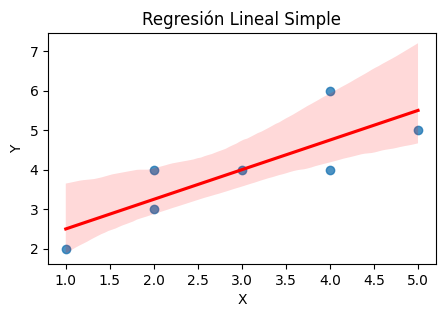

In [5]:
import seaborn as sns

# Crear la gráfica de regresión lineal
plt.figure(figsize=(5, 3))  # Definir tamaño de la figura
df_sin_ultima_fila = df.iloc[:-1]  # Excluir la última fila
sns.regplot(x='X', y='Y', data=df_sin_ultima_fila, line_kws={"color": "red"})

# Añadir etiquetas y título
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Lineal Simple')

# Mostrar la gráfica
plt.show()

In [6]:
nf= pd.DataFrame({'X': [df['X'].sum()], 'Y': [df['Y'].sum()], 'XY': [df['XY'].sum()], 'X2': [df['X2'].sum()]})
df = pd.concat([df, nf], ignore_index=True)
df

,X,Y,XY,X2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36
8,27,35,135,111


In [7]:
df['Ypred'] = df	['X'] * pendiente + intercepto
df

,X,Y,XY,X2,Ypred
0,1,2,2,1,2.358491
1,2,3,6,4,3.207547
2,2,4,8,4,3.207547
3,3,4,12,9,4.056604
4,4,4,16,16,4.905660
5,4,6,24,16,4.905660
6,5,5,25,25,5.754717
7,6,7,42,36,6.603774
8,27,35,135,111,24.433962


In [8]:
df['Error'] = df['Y'] - df['Ypred']
df

,X,Y,XY,X2,Ypred,Error
0,1,2,2,1,2.358491,-0.358491
1,2,3,6,4,3.207547,-0.207547
2,2,4,8,4,3.207547,0.792453
3,3,4,12,9,4.056604,-0.056604
4,4,4,16,16,4.905660,-0.905660
5,4,6,24,16,4.905660,1.094340
6,5,5,25,25,5.754717,-0.754717
7,6,7,42,36,6.603774,0.396226
8,27,35,135,111,24.433962,10.566038


In [9]:
df['Error**2'] = (df['Error'] ** 2)
df

,X,Y,XY,X2,Ypred,Error,Error**2
0,1,2,2,1,2.358491,-0.358491,0.128515
1,2,3,6,4,3.207547,-0.207547,0.043076
2,2,4,8,4,3.207547,0.792453,0.627981
3,3,4,12,9,4.056604,-0.056604,0.003204
4,4,4,16,16,4.905660,-0.905660,0.820221
5,4,6,24,16,4.905660,1.094340,1.197579
6,5,5,25,25,5.754717,-0.754717,0.569598
7,6,7,42,36,6.603774,0.396226,0.156995
8,27,35,135,111,24.433962,10.566038,111.641153


In [10]:
df['MSE']= df['Error**2'] / (len(df) - 1)
df

,X,Y,XY,X2,Ypred,Error,Error**2,MSE
0,1,2,2,1,2.358491,-0.358491,0.128515,0.016064
1,2,3,6,4,3.207547,-0.207547,0.043076,0.005384
2,2,4,8,4,3.207547,0.792453,0.627981,0.078498
3,3,4,12,9,4.056604,-0.056604,0.003204,0.000400
4,4,4,16,16,4.905660,-0.905660,0.820221,0.102528
5,4,6,24,16,4.905660,1.094340,1.197579,0.149697
6,5,5,25,25,5.754717,-0.754717,0.569598,0.071200
7,6,7,42,36,6.603774,0.396226,0.156995,0.019624
8,27,35,135,111,24.433962,10.566038,111.641153,13.955144
